In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

import os
import numpy as np
import matplotlib.pyplot as plt


In [2]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [5]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=(32,32,3)),

    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    ## output layer
    layers.Dense(10, activation='softmax')
])
model.summary()
RMSpropmodel = keras.Sequential([
    keras.Input(shape=(32, 32, 3)),
    layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])
RMSpropmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

In [6]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
h = model.fit(x=X_train, y=Y_train, epochs=13, validation_split=0.3, batch_size=256)

Epoch 1/13
137/137 [==============================] - 14s 18ms/step - loss: 1.8935 - accuracy: 0.2952 - val_loss: 1.6056 - val_accuracy: 0.4195
Epoch 2/13
137/137 [==============================] - 1s 10ms/step - loss: 1.5446 - accuracy: 0.4331 - val_loss: 1.4277 - val_accuracy: 0.4822
Epoch 3/13
137/137 [==============================] - 1s 11ms/step - loss: 1.3932 - accuracy: 0.4942 - val_loss: 1.4129 - val_accuracy: 0.5020
Epoch 4/13
137/137 [==============================] - 1s 10ms/step - loss: 1.3064 - accuracy: 0.5293 - val_loss: 1.2290 - val_accuracy: 0.5685
Epoch 5/13
137/137 [==============================] - 2s 14ms/step - loss: 1.2187 - accuracy: 0.5666 - val_loss: 1.1926 - val_accuracy: 0.5713
Epoch 6/13
137/137 [==============================] - 2s 12ms/step - loss: 1.1428 - accuracy: 0.5936 - val_loss: 1.1944 - val_accuracy: 0.5799
Epoch 7/13
137/137 [==============================] - 2s 12ms/step - loss: 1.0900 - accuracy: 0.6142 - val_loss: 1.0972 - val_accuracy: 0.611

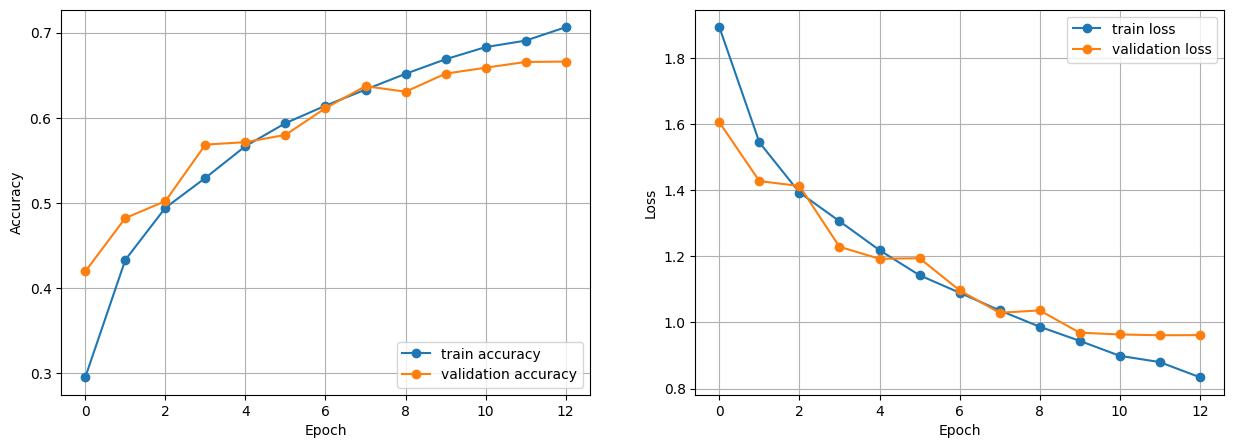

In [8]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [9]:
RMSpropmodel.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
RMSproph = RMSpropmodel.fit(x=X_train, y=Y_train, epochs=13, validation_split=0.3, batch_size=256)


Epoch 1/13
137/137 [==============================] - 4s 16ms/step - loss: 2.0896 - accuracy: 0.2246 - val_loss: 1.8076 - val_accuracy: 0.3675
Epoch 2/13
137/137 [==============================] - 1s 10ms/step - loss: 1.8160 - accuracy: 0.3369 - val_loss: 1.6260 - val_accuracy: 0.4014
Epoch 3/13
137/137 [==============================] - 1s 11ms/step - loss: 1.6654 - accuracy: 0.3938 - val_loss: 1.4794 - val_accuracy: 0.4768
Epoch 4/13
137/137 [==============================] - 1s 11ms/step - loss: 1.5640 - accuracy: 0.4367 - val_loss: 1.6818 - val_accuracy: 0.4093
Epoch 5/13
137/137 [==============================] - 1s 11ms/step - loss: 1.4784 - accuracy: 0.4686 - val_loss: 1.4055 - val_accuracy: 0.5002
Epoch 6/13
137/137 [==============================] - 1s 10ms/step - loss: 1.4102 - accuracy: 0.4964 - val_loss: 1.2663 - val_accuracy: 0.5519
Epoch 7/13
137/137 [==============================] - 2s 12ms/step - loss: 1.3410 - accuracy: 0.5241 - val_loss: 1.3284 - val_accuracy: 0.5282

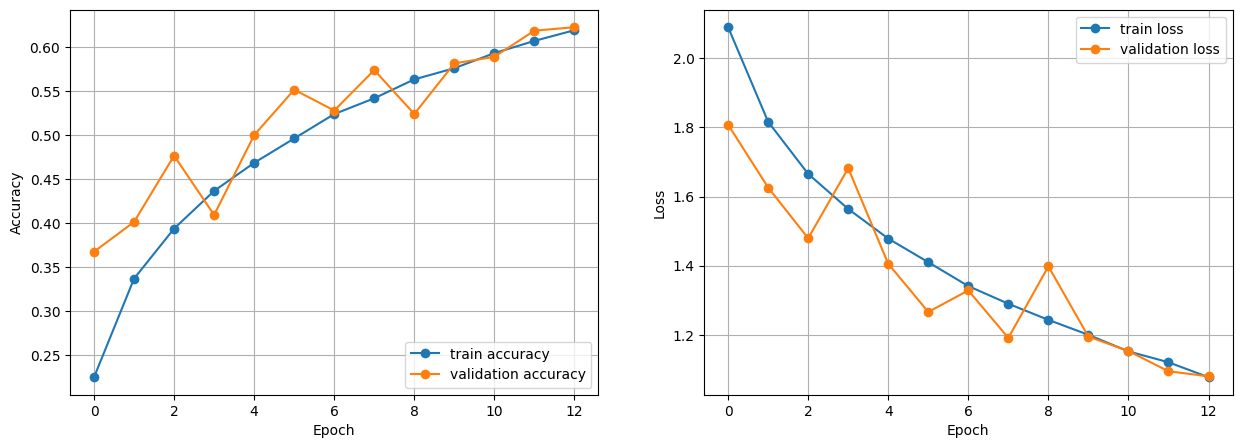

In [11]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(RMSproph.history['accuracy'], 'o-', label='train accuracy')
plt.plot(RMSproph.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(RMSproph.history['loss'], 'o-', label='train loss')
plt.plot(RMSproph.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [ ]:
RMSpropmodel.compile(
    optimizer=keras.optimizers.legacy.SGD(learning_rate=0.001, momentum=0.5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
SGDh = RMSpropmodel.fit(x=X_train, y=Y_train, epochs=10, validation_split=0.3, batch_size=256)

Epoch 1/10
137/137 [==============================] - 3s 17ms/step - loss: 0.9656 - accuracy: 0.6611 - val_loss: 1.0033 - val_accuracy: 0.6439
Epoch 2/10
137/137 [==============================] - 2s 12ms/step - loss: 0.9474 - accuracy: 0.6669 - val_loss: 0.9963 - val_accuracy: 0.6454
Epoch 3/10
137/137 [==============================] - 2s 11ms/step - loss: 0.9404 - accuracy: 0.6684 - val_loss: 0.9931 - val_accuracy: 0.6475
Epoch 4/10
137/137 [==============================] - 1s 10ms/step - loss: 0.9321 - accuracy: 0.6726 - val_loss: 0.9929 - val_accuracy: 0.6477
Epoch 5/10
137/137 [==============================] - 1s 10ms/step - loss: 0.9344 - accuracy: 0.6714 - val_loss: 0.9892 - val_accuracy: 0.6487
Epoch 6/10
137/137 [==============================] - 1s 10ms/step - loss: 0.9341 - accuracy: 0.6716 - val_loss: 0.9887 - val_accuracy: 0.6502
Epoch 7/10
137/137 [==============================] - 1s 10ms/step - loss: 0.9329 - accuracy: 0.6718 - val_loss: 0.9872 - val_accuracy: 0.6508

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(SGDh.history['accuracy'], 'o-', label='train accuracy')
plt.plot(SGDh.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(SGDh.history['loss'], 'o-', label='train loss')
plt.plot(SGDh.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()